# Flight delays in 2009 and 2019 in USA: Data exploration

## by Kamila Hamalcikova

## Preliminary Wrangling

This document contains dataset of flight delays in US on months of July and December of 2009 and 2019. The dataset contains nearly 2 400 thousand different delays and their attributes.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
# load in the datasets into a pandas dataframes
# data were downloaded from https://www.transtats.bts.gov/DL_SelectFields.asp
# explanation of data: https://www.transtats.bts.gov/Fields.asp

jul2009 = pd.read_csv('flightsjuly2009.csv')
dec2009 = pd.read_csv('flightsdec2009.csv')
jul2019 = pd.read_csv('flightsjuly2019.csv')
dec2019 = pd.read_csv('flightsdec2019.csv')

In [3]:
# merge all dataframes in one
flights = pd.concat([jul2009, dec2009, jul2019, dec2019], ignore_index=True)
flights.columns

Index(['YEAR', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 29'],
      dtype='object')

In [4]:
# change names of columns to visually more pleasible lowercase
flights.columns = flights.columns.str.lower()
# check dataset
pd.set_option("display.max_columns", 30)
flights.sample(5)

,year,day_of_week,fl_date,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,dep_delay_new,crs_arr_time,arr_time,arr_delay,arr_delay_new,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 29
631911,2009,3,2009-12-02,MQ,N655MQ,TYR,"Tyler, TX",DFW,"Dallas/Fort Worth, TX",1750,1817.0,27.0,27.0,1835,1854.0,19.0,19.0,0.0,NaN,0.0,45.0,37.0,23.0,103.0,0.0,0.0,0.0,0.0,19.0,NaN
2308082,2019,5,2019-12-13,DL,N365NW,MSY,"New Orleans, LA",DTW,"Detroit, MI",1822,1840.0,18.0,18.0,2150,2200.0,10.0,10.0,0.0,NaN,0.0,148.0,140.0,119.0,926.0,NaN,NaN,NaN,NaN,NaN,NaN
9229,2009,2,2009-07-14,AA,N448AA,ORD,"Chicago, IL",SLC,"Salt Lake City, UT",1905,1905.0,0.0,0.0,2130,2130.0,0.0,0.0,0.0,NaN,0.0,205.0,205.0,182.0,1249.0,NaN,NaN,NaN,NaN,NaN,NaN
2241213,2019,6,2019-12-21,YX,N433YX,MIA,"Miami, FL",IND,"Indianapolis, IN",1530,1529.0,-1.0,0.0,1823,1825.0,2.0,2.0,0.0,NaN,0.0,173.0,176.0,143.0,1020.0,NaN,NaN,NaN,NaN,NaN,NaN
82753,2009,5,2009-07-24,UA,N430UA,LAS,"Las Vegas, NV",SFO,"San Francisco, CA",1030,1129.0,59.0,59.0,1208,1308.0,60.0,60.0,0.0,NaN,0.0,98.0,99.0,63.0,414.0,59.0,0.0,1.0,0.0,0.0,NaN


In [5]:
# delete duplicates (if any occurred)
flights.duplicated().sum()

0

In [6]:
flights

,year,day_of_week,fl_date,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,dep_delay_new,crs_arr_time,arr_time,arr_delay,arr_delay_new,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 29
0,2009,6,2009-07-25,9E,80419E,DTW,"Detroit, MI",RIC,"Richmond, VA",1425,1421.0,-4.0,0.0,1610,1553.0,-17.0,0.0,0.0,NaN,0.0,105.0,92.0,67.0,456.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,7,2009-07-26,9E,89339E,DTW,"Detroit, MI",RIC,"Richmond, VA",1425,1439.0,14.0,14.0,1610,1605.0,-5.0,0.0,0.0,NaN,0.0,105.0,86.0,67.0,456.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,1,2009-07-27,9E,89249E,DTW,"Detroit, MI",RIC,"Richmond, VA",1425,1420.0,-5.0,0.0,1610,1555.0,-15.0,0.0,0.0,NaN,0.0,105.0,95.0,69.0,456.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,2,2009-07-28,9E,85059E,DTW,"Detroit, MI",RIC,"Richmond, VA",1425,1421.0,-4.0,0.0,1610,1552.0,-18.0,0.0,0.0,NaN,0.0,105.0,91.0,68.0,456.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,3,2009-07-29,9E,80019E,DTW,"Detroit, MI",RIC,"Richmond, VA",1425,1429.0,4.0,4.0,1610,1609.0,-1.0,0.0,0.0,NaN,0.0,105.0,100.0,73.0,456.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394190,2019,2,2019-12-31,B6,N193JB,MCO,"Orlando, FL",SWF,"Newburgh/Poughkeepsie, NY",1356,1500.0,64.0,64.0,1639,1731.0,52.0,52.0,0.0,NaN,0.0,163.0,151.0,126.0,989.0,52.0,0.0,0.0,0.0,0.0,NaN
2394191,2019,2,2019-12-31,B6,N304JB,DCA,"Washington, DC",BOS,"Boston, MA",1420,1414.0,-6.0,0.0,1550,1533.0,-17.0,0.0,0.0,NaN,0.0,90.0,79.0,57.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN
2394192,2019,2,2019-12-31,B6,N193JB,PHL,"Philadelphia, PA",BOS,"Boston, MA",700,652.0,-8.0,0.0,825,751.0,-34.0,0.0,0.0,NaN,0.0,85.0,59.0,42.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
2394193,2019,2,2019-12-31,B6,N563JB,BOS,"Boston, MA",SJU,"San Juan, PR",813,812.0,-1.0,0.0,1315,1248.0,-27.0,0.0,0.0,NaN,0.0,242.0,216.0,203.0,1674.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# getting state of origin and dest as seperate variable
origin_split = flights.origin_city_name.str.split(', ', n = 1, expand=True)
flights['origin_state'] = origin_split[1]
origin_split = flights.dest_city_name.str.split(', ', n = 1, expand=True)
flights['dest_state'] = origin_split[1]

In [8]:
flights.columns

Index(['year', 'day_of_week', 'fl_date', 'op_unique_carrier', 'tail_num',
       'origin', 'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'dep_delay_new', 'crs_arr_time', 'arr_time',
       'arr_delay', 'arr_delay_new', 'cancelled', 'cancellation_code',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'unnamed: 29', 'origin_state',
       'dest_state'],
      dtype='object')

In [9]:
# converting floats to integers
float_vars = ['dep_time', 'dep_delay', 'dep_delay_new', 'arr_time', 'arr_delay', 'arr_delay_new', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'cancelled', 'diverted']

for col in float_vars:
    flights[col].fillna(0, inplace=True)
    flights[col] = flights[col].astype(int)

In [10]:
# check portion of cancelled and diverted flights
cancel_divert = flights.loc[(flights.cancelled == 1) | (flights.diverted) == 1]
cancel_divert.shape[0], flights.shape[0], cancel_divert.shape[0]/flights.shape[0]*100

(47119, 2394195, 1.968051892180879)

In [11]:
cancel_divert_l = list(cancel_divert.index)

In [12]:
# removing redundant rows 
# cancelled and diverted flights can't get any delays and they represent only nearly 2 % of dataset
flights.drop(flights.index[cancel_divert_l], axis=0, inplace=True)

In [13]:
# removing redundant columns (variables connected to cancellations and divertions, nonsense Unnamed and )day of week will used as day name)
flights.drop(['cancelled', 'cancellation_code', 'diverted', 'day_of_week', 'unnamed: 29'], axis=1, inplace=True)

In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347076 entries, 0 to 2394194
Data columns (total 27 columns):
year                   int64
fl_date                object
op_unique_carrier      object
tail_num               object
origin                 object
origin_city_name       object
dest                   object
dest_city_name         object
crs_dep_time           int64
dep_time               int32
dep_delay              int32
dep_delay_new          int32
crs_arr_time           int64
arr_time               int32
arr_delay              int32
arr_delay_new          int32
crs_elapsed_time       int32
actual_elapsed_time    int32
air_time               int32
distance               int32
carrier_delay          int32
weather_delay          int32
nas_delay              int32
security_delay         int32
late_aircraft_delay    int32
origin_state           object
dest_state             object
dtypes: int32(15), int64(3), object(9)
memory usage: 367.1+ MB


In [15]:
# converting integers to time string in format HH:MM:SS for later transformation to timedelta
time_vars = ['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']

for col in time_vars:
    flights[col] = flights[col].astype(str)
    
def hours_min_format(col):
    flights[col] = flights[col].str.pad(width=4, fillchar='0')
    flights[col] = flights[col].str[:2]+ ":" + flights[col].str[2:] + ":00"
    
for col in time_vars:
    hours_min_format(col)

In [16]:
flights.isna().sum()

year                   0
fl_date                0
op_unique_carrier      0
tail_num               0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
dep_delay_new          0
crs_arr_time           0
arr_time               0
arr_delay              0
arr_delay_new          0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
origin_state           0
dest_state             0
dtype: int64

In [17]:
flights.to_csv('fly.csv', index=None)

In [18]:
# how to avoid losing timedeltas when saving and loading csv file
# source: https://stackoverflow.com/questions/43487841/loose-timedelta-format-when-i-export-to-csv-is-there-a-solution
converters = dict(fl_date=pd.to_datetime, dep_time=pd.to_timedelta, crs_dep_time=pd.to_timedelta, 
                  arr_time=pd.to_timedelta, crs_arr_time=pd.to_timedelta)
flydata = pd.read_csv('fly.csv', converters=converters)

In [19]:
flydata.head()

,year,fl_date,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,dep_delay_new,crs_arr_time,arr_time,arr_delay,arr_delay_new,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,dest_state
0,2009,2009-07-25,9E,80419E,DTW,"Detroit, MI",RIC,"Richmond, VA",14:25:00,14:21:00,-4,0,16:10:00,15:53:00,-17,0,105,92,67,456,0,0,0,0,0,MI,VA
1,2009,2009-07-26,9E,89339E,DTW,"Detroit, MI",RIC,"Richmond, VA",14:25:00,14:39:00,14,14,16:10:00,16:05:00,-5,0,105,86,67,456,0,0,0,0,0,MI,VA
2,2009,2009-07-27,9E,89249E,DTW,"Detroit, MI",RIC,"Richmond, VA",14:25:00,14:20:00,-5,0,16:10:00,15:55:00,-15,0,105,95,69,456,0,0,0,0,0,MI,VA
3,2009,2009-07-28,9E,85059E,DTW,"Detroit, MI",RIC,"Richmond, VA",14:25:00,14:21:00,-4,0,16:10:00,15:52:00,-18,0,105,91,68,456,0,0,0,0,0,MI,VA
4,2009,2009-07-29,9E,80019E,DTW,"Detroit, MI",RIC,"Richmond, VA",14:25:00,14:29:00,4,4,16:10:00,16:09:00,-1,0,105,100,73,456,0,0,0,0,0,MI,VA


In [20]:
# create backup file in case of changes being done in next steps
fly = flydata.copy()

In [21]:
pd.set_option("display.max_columns", 40)
fly.sample(5)

,year,fl_date,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,dep_delay_new,crs_arr_time,arr_time,arr_delay,arr_delay_new,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,dest_state
363245,2009,2009-07-13,NW,N332NW,JFK,"New York, NY",MSP,"Minneapolis, MN",11:29:00,11:26:00,-3,0,13:34:00,13:46:00,12,12,185,200,167,1028,0,0,0,0,0,NY,MN
1291266,2019,2019-07-14,OO,N449SW,LAN,"Lansing, MI",DTW,"Detroit, MI",15:06:00,15:03:00,-3,0,15:55:00,15:50:00,-5,0,49,47,22,74,0,0,0,0,0,MI,MI
1253425,2019,2019-07-01,YV,N85355,IAD,"Washington, DC",HHH,"Hilton Head, SC",12:30:00,12:26:00,-4,0,14:14:00,14:10:00,-4,0,104,104,79,498,0,0,0,0,0,DC,SC
23591,2009,2009-07-24,CO,N32626,AUS,"Austin, TX",EWR,"Newark, NJ",17:30:00,17:22:00,-8,0,22:40:00,23:03:00,23,23,250,281,260,1504,0,0,23,0,0,TX,NJ
1614397,2019,2019-07-08,OO,N182SY,SFO,"San Francisco, CA",DAL,"Dallas, TX",16:15:00,16:20:00,5,5,21:55:00,21:57:00,2,2,220,217,185,1476,0,0,0,0,0,CA,TX


In [22]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347076 entries, 0 to 2347075
Data columns (total 27 columns):
year                   int64
fl_date                datetime64[ns]
op_unique_carrier      object
tail_num               object
origin                 object
origin_city_name       object
dest                   object
dest_city_name         object
crs_dep_time           timedelta64[ns]
dep_time               timedelta64[ns]
dep_delay              int64
dep_delay_new          int64
crs_arr_time           timedelta64[ns]
arr_time               timedelta64[ns]
arr_delay              int64
arr_delay_new          int64
crs_elapsed_time       int64
actual_elapsed_time    int64
air_time               int64
distance               int64
carrier_delay          int64
weather_delay          int64
nas_delay              int64
security_delay         int64
late_aircraft_delay    int64
origin_state           object
dest_state             object
dtypes: datetime64[ns](1), int64(14), object(8)

In [23]:
fly.shape[0]

2347076

### Structure of dataset

> There is almost 2 350 000 flights in my dataset. It consists only of flights that could have had some delay. Cancelled and diverted flights were removed.

> In the dataset we have these '**categorical variables**:
- *Name of airline* (op_unique_carrier)
- *Name of airports* (depending on arrival or departure in origin or dest)
- *Year* (year), because we investigate just 2 months of 2009 and 2019, year can be treated as categorical variable.
- *Name of day in week or month* can be extracted from flight date (fl_date)

> and also many **numerical variables**:
- *Delay in minutes on arrival (with negative values in case of early arrival)* (arr_delay)
- *Delay in minutes on arrival (only positive values, no delay = 0)* (arr_delay_new)
- *Delay in minutes based on reason of delay* (carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay) in more details (source: [Bureau of Transportation Statistics](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations):
    - *Air Carrier*: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
    - *Extreme Weather*: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
    - *National Aviation System (NAS)*: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
    - *Late-arriving aircraft*: A previous flight with same aircraft arrived late, causing the present flight to depart late.
    - *Security*: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- *Departure time* (dep_time)
- *Distance*

### Main features of interest in the dataset

> I would like to find out what kind of flight shouldn't travellers pick to avoid significant delay. For now, let's say significant delay would be 10 or 15 minutes. Therefore I will be mainly looking on Delay in minutes on arrival, time variables and categorical variables like airline or airport.

> I will be mainly looking on Delay in minutes on arrival, time variables and categorical variables like airline or airport. Also different reasons of delays are worth exploring.

## Univariate Exploration

- Delays
- Delay reasons
- Airlines
- Airports
- Time
- Flight distance

### Delays

In [24]:
# to see only two decimals in number format
pd.options.display.float_format = "{:,.2f}".format

To get general idea, let's check proportion of flights that gets delayed.

In [25]:
delay1 = (fly[fly['arr_delay']>0]).shape[0]/fly.shape[0] # any delay
delay10 = (fly[fly['arr_delay']>9]).shape[0]/fly.shape[0] # delay 10 minutes and more
delay15 = (fly[fly['arr_delay']>14]).shape[0]/fly.shape[0] # delay 15 minutes and more
early = (fly[fly['arr_delay'] < 0]).shape[0]/fly.shape[0] # arriving early
early15 = (fly[fly['arr_delay'] < -14]).shape[0]/fly.shape[0] # arriving early 15 minutes and more
ontime = (fly[fly['arr_delay'] == 0]).shape[0]/fly.shape[0] # arriving on time
delay1*100, delay10*100, delay15*100, early*100, early15*100, ontime*100

(39.95639681032911,
 26.601908076261697,
 21.985824063643445,
 57.88001751967129,
 21.008182095509476,
 2.163585669999608)

The cell above are showing that majority of planes actually arrives early to destination. **Suprising 58 % did arrive at least 1 minute earlier.** There is quite **similar share of flights that arrives 15 minutes+ earlier or later (21 % earlier and 22 % later)**. Even though only 2 % of flights arrive exactly on time, we can see from graph below that vast majority of flights arrives on time or just slightly earlier or later.

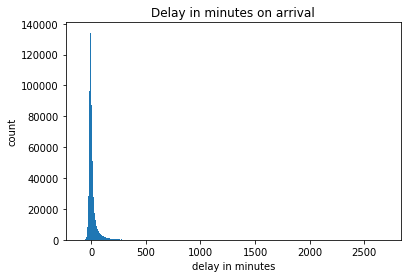

In [26]:
bins=np.arange(fly.arr_delay.min(),fly.arr_delay.max()+2, 2)
plt.hist(data=fly, x='arr_delay', bins=bins)
plt.title('Delay in minutes on arrival')
plt.xlabel('delay in minutes')
plt.ylabel('count');

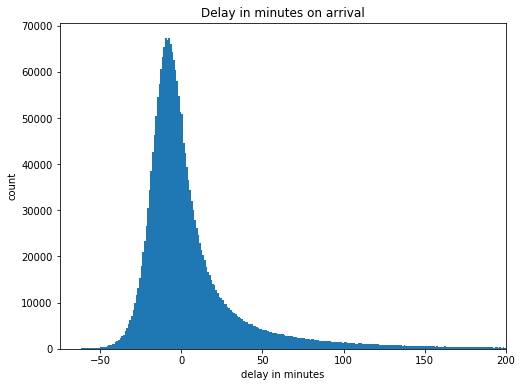

In [27]:
# zooming on values between -75 and 200 delay
bins=np.arange(fly.arr_delay.min(),fly.arr_delay.max()+1, 1)
plt.figure(figsize =(8, 6))
plt.hist(data=fly, x='arr_delay', bins=bins)
plt.title('Delay in minutes on arrival')
plt.xlim(-75, 200)
plt.xlabel('delay in minutes')
plt.ylabel('count');

When looking more on detail, we can see that distribution of arrival delays is unimodal with peak on 0. Distribution looks almost normal, even though there is long tail on the right side.

In [28]:
fly[['arr_delay', 'arr_delay_new']].describe()

,arr_delay,arr_delay_new
count,"2,347,076.00","2,347,076.00"
mean,7.85,15.23
std,48.37,45.10
min,-93.00,0.00
25%,-13.00,0.00
50%,-4.00,0.00
75%,11.00,11.00
max,"2,695.00","2,695.00"


From my experience, passengers planning their trips usually care only if the flight was delayed and how long might the delay take. Therefore using variable arr_delay for measuring delays might be confusing. Also 5 or 10 minutes delay is probably some time reserve that people mostly take into consideration when planning flights. In the line of this thinking I decided to **consider as delay only late arrival of 15 and more minutes**. For easier analysis I will **add new variable big_delay**, which will be 0 for all flights arriving sooner than 15 minutes late and 1 for those 15+ minutes late. This will be useful especially when dealing with categorical variables with lots of categories. 

In [29]:
# new boolean variable to determine if significant delay occurred on flight
fly['big_delay'] = np.where(fly['arr_delay_new']>14, 1, 0)

#### Dealing with outliers
For delays I will use variables arr_delay_new or big_delay, so only very high values for arr_delay_new can appear as outliers. I found **43 potential outliers, where delay was longer than one day (1440 minutes)**. Except 3 all were from year 2019 and almost 75 % of all cases belonged only to 2 airlines (AA and OO), also 75 % of them stated as reason for really long delay carrier (over 12 hours). **These outliers do not seem as human errors, basically it looks as certain airlines didn't maintain their planes very well, therefore I decided to keep these outliers in dataset**. 

In [30]:
# how many cases have delay longer than one day?
len(fly.query('arr_delay_new > 1440'))

43

In [31]:
# majority of very long delays happened to just 2 airline companies (AA or OO)
len(fly.query('arr_delay_new > 1440 & (op_unique_carrier == "AA" | op_unique_carrier == "OO")'))

32

In [32]:
# 75 % of very long delays were caused by airline 
# (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.)
len(fly.query('arr_delay_new > 1440 & carrier_delay > 720'))

33

### Airlines

In [33]:
fly.op_unique_carrier.nunique()

22

There is 22 different airlines in our dataset. How do they differ in number of flights?

But first, I would like to know their full names, not just name codes, so I will use another file carriers to get names of airlines.

In [34]:
# loading dataset with airline names
carriers = pd.read_csv('carriers.csv')
carriers.sample(3)

,Code,Description
282,BEN,Bennington Aviation Inc.
1159,SKM,Scheduled Skyways
1202,STW,Stateswest Airlines


In [35]:
# creating new table with airline names
fly_with_carriers = fly.merge(carriers, left_on='op_unique_carrier', right_on='Code', how='left')
fly_with_carriers.sample(3)

,year,fl_date,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,dep_delay_new,crs_arr_time,arr_time,arr_delay,arr_delay_new,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,dest_state,big_delay,Code,Description
2082409,2019,2019-12-29,WN,N458WN,SFO,"San Francisco, CA",DEN,"Denver, CO",12:50:00,12:43:00,-7,0,16:20:00,15:55:00,-25,0,150,132,119,967,0,0,0,0,0,CA,CO,0,WN,Southwest Airlines Co.
665519,2009,2009-12-12,WN,N735SA,LAX,"Los Angeles, CA",OAK,"Oakland, CA",19:00:00,19:20:00,20,20,20:15:00,20:39:00,24,24,75,79,66,337,16,0,4,0,4,CA,CA,1,WN,Southwest Airlines Co.
236924,2009,2009-07-16,UA,N404UA,SFO,"San Francisco, CA",IAD,"Washington, DC",23:22:00,23:12:00,-10,0,07:31:00,07:13:00,-18,0,309,301,263,2419,0,0,0,0,0,CA,DC,0,UA,United Air Lines Inc.


In [36]:
# What airlines had most of long delays? (as found previouslu in delay section)
fly_with_carriers.query('Code == "AA"') # American Airlines
fly_with_carriers.query('Code == "OO"') # Skywest Airlines
# some 'cosmetic' changes to outlook of dataset (change of very long airline name and more comprehensive column name)
fly_with_carriers.rename(columns={'Description':"airline"}, inplace=True)
fly_with_carriers.loc[fly_with_carriers.airline == 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 'airline']= "US Airways Inc."

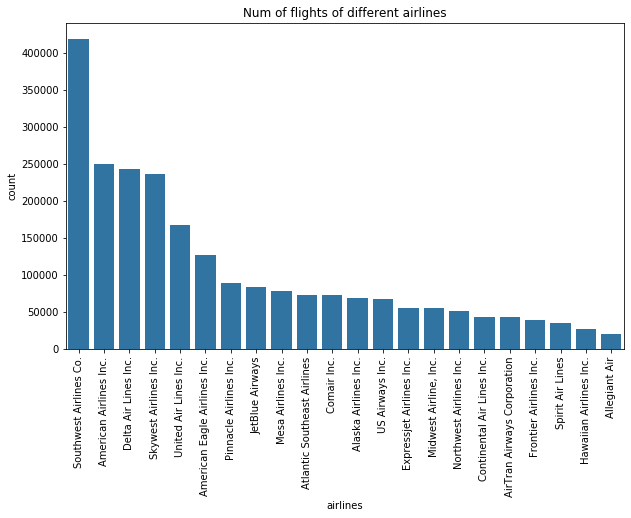

In [37]:
# How many flights each airline performed?
plt.figure(figsize =(10, 6))
base_color = sns.color_palette()[0]
chart = sns.countplot(data=fly_with_carriers, x='airline', color = base_color, order = fly_with_carriers.airline.value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.grid(False)
plt.title('Num of flights of different airlines')
plt.xlabel('airlines');



We can see airlines differ greatly in terms of performed flights, therefore in bivariate analysis proportions should be always used when comparing different airlines.

### Airports

In [38]:
# how many airports do we have in dataset?
fly.origin.nunique(), fly.dest.nunique()

(371, 371)

For comparison of airports I will take same approach as with airlines. That is to get one single number **for each airport as % of delayed flights to total flights** which took of from certain airport. So table with number of flights will come handy later.

In [39]:
# new dataframe with airports data
airports_stat = fly.groupby(["origin_city_name"]).size().reset_index(name='num_of_flights')
# we can see for example 24 busiest airports in USA
airports_stat.sort_values(by=['num_of_flights'], ascending=False).head(24)

,origin_city_name,num_of_flights
18,"Atlanta, GA",138151
63,"Chicago, IL",136434
82,"Dallas/Fort Worth, TX",96254
236,"New York, NY",84708
87,"Denver, CO",84554
149,"Houston, TX",81541
198,"Los Angeles, CA",71328
264,"Phoenix, AZ",61788
59,"Charlotte, NC",58745
348,"Washington, DC",57731


For further analysis, I have selected only 24 out 371 US airports based on highest number of flights. These 24 airports had more than 25 000 flights in selected period.

### Delay reasons

What delay reasons occur most often?

In [40]:
# to find out we need to use delay reasons as categorical values in new dataframe
reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# loop to count % of delayed flights for each reason
pct_reason = []

for reason in reasons:
    per_reason = (fly[fly[reason]>0].shape[0] / fly.shape[0])*100
    pct_reason.append(per_reason)   
    
frame = {'delay_reason': reasons, '% of total flights': pct_reason}

# new dataframe just for delay reasons
reasons_pct = pd.DataFrame(frame)

reasons_pct = reasons_pct.sort_values(by=['% of total flights'], ascending=False)
reasons_pct

,delay_reason,% of total flights
2,nas_delay,12.04
4,late_aircraft_delay,11.33
0,carrier_delay,10.70
1,weather_delay,1.50
3,security_delay,0.09


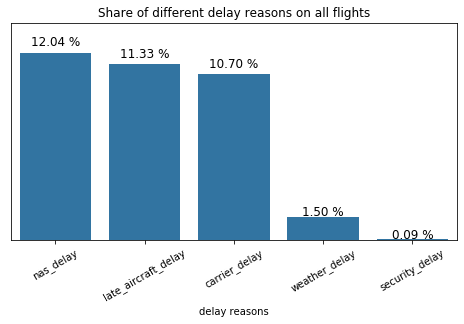

In [41]:
plt.figure(figsize=(8, 4))

chart = sns.barplot(x='delay_reason', y='% of total flights', data=reasons_pct, color=base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set(yticks=[])
plt.ylim(0, 14)
plt.title('Share of different delay reasons on all flights')
plt.xlabel('delay reasons')
plt.ylabel('')


for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.04,
            "{:,.2f} %".format(height),
            ha="center", size=12) ;

Delays because of weather and security reasons appear quite rarely. When comparing performance of different airlines we would be mainly interested in carrier delay because other delay reasons are out of control for airlines (or anyone else). 

### Time

In [42]:
fly['month'] = fly['fl_date'].dt.month
fly.groupby(['year', 'month'])['fl_date'].size().to_frame(name = 'count').reset_index()

,year,month,count
0,2009,7,571632
1,2009,12,513051
2,2019,7,643781
3,2019,12,618612


In [43]:
g = fly.groupby(['year', ])['fl_date'].count()
# 16 % increase of number of flights between 2009 and 2019 
g.values[1]*100/g.values[0]-100

16.38358856919487

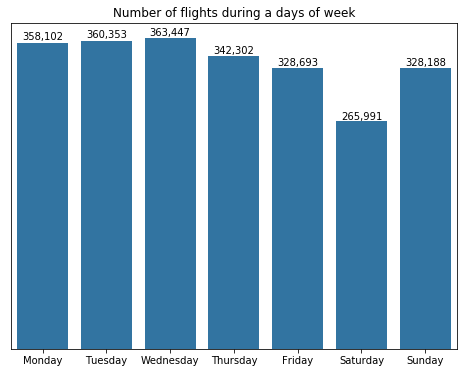

In [44]:
# source for annotation: https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

fly['fl_day'] = fly['fl_date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_day = pd.api.types.CategoricalDtype(ordered=True, categories=day_order)
fly['fl_day'] = fly['fl_day'].astype(ordered_day)

plt.figure(figsize=(8,6))
ax = sns.countplot(data=fly, x='fl_day', color=base_color, order=day_order)
# hide y axis values https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn
ax.set(yticks=[])
plt.title('Number of flights during a days of week')
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center")

Can we experience more delays in first half of the week, because there is more flights than from Friday to Sunday? I will look more deeply into it in bivariate exploration.

In [45]:
fly['hour'] = pd.to_datetime(fly.crs_dep_time).dt.hour

C:\Users\kamil\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


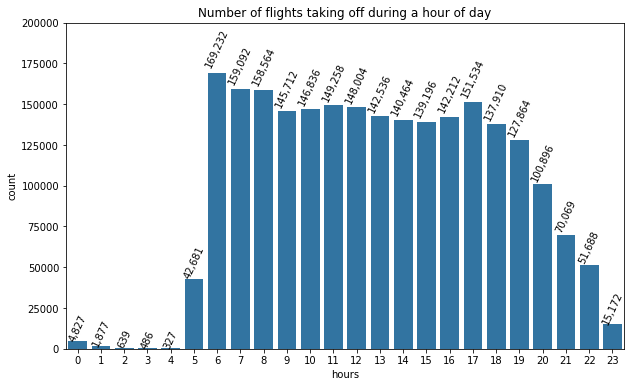

In [46]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=fly, x='hour', color=base_color)
ax.grid(False)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.02,
            "{:,}".format(height),
            ha="center", rotation=65) 
plt.ylim(0, 200000)    
plt.title('Number of flights taking off during a hour of day')
plt.xlabel('hours');

We can see that airports are **the most busy from 6:00 to 18:00, especially from 06:00 to 09:00**. I would assume these hours would gain more delays because of heavier workload for airport employees. We will look more on this assumption in bivariate exploration.

### Distance

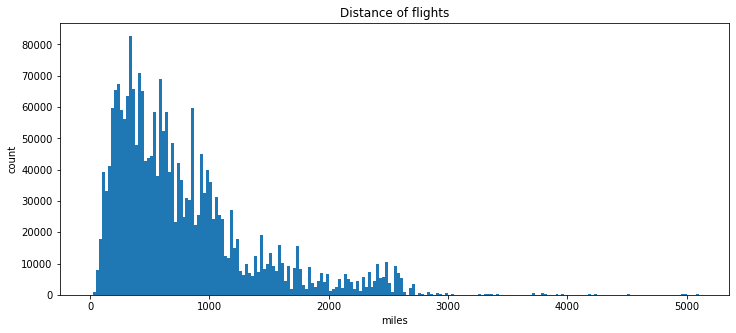

In [47]:
plt.figure(figsize =(12, 5))
binsize = 25
bins=np.arange(0, fly.distance.max()+binsize, binsize)
plt.hist(data=fly, x='distance', bins=bins)
plt.title('Distance of flights')
plt.xlabel('miles')
plt.ylabel('count');

Distribution of flight distance is right skewed with long tail, after checking for outliers I will use log transformation. 

In [48]:
fly.distance.describe()

count   2,347,076.00
mean          776.82
std           587.90
min            11.00
25%           347.00
50%           612.00
75%         1,009.00
max         5,095.00
Name: distance, dtype: float64

In [49]:
# Are all long distance flights to or from Hawaii?
Hawaii = ["KOA", "HNL", "OGG"] # codes of three airports in Hawaii (Kona, Kahahui and Honolulu)
len(fly[(fly.distance > 3500) & ((fly.origin.isin(Hawaii) | fly.dest.isin(Hawaii)))])

3058

In [50]:
len((fly.query('distance > 3500')))

3058


I have checked for **outliers** with distance over 3500 miles. All cases are connected with **flights to or from Hawaii**. Clearly, they are not mistakes, so I am keeping them in dataset. Anyway, I created new dataframe fly_wo_Hawaii, just in case it will be useful further down the road, for bivariate exploration.

In [51]:
# new dataset without Hawaii flights
fly_wo_Hawaii = fly[~(fly.origin.isin(Hawaii) | fly.dest.isin(Hawaii))]

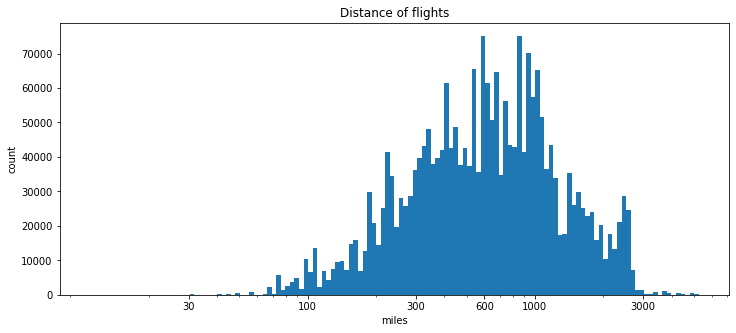

In [52]:
# log transformation of distance
binsize = 0.02
bins = 10 ** np.arange(np.log10(fly.distance.min()),np.log10(fly.distance.max())+binsize, binsize)
plt.figure(figsize =(12, 5))
plt.hist(data=fly, x='distance', bins=bins)
plt.title('Distance of flights')
plt.xscale('log')
ticks = [30, 100, 300, 600, 1000, 3000]
plt.xticks(ticks, ticks)
plt.xlabel('miles')
plt.ylabel('count');

Log-scale distribution is more close to normal distribution, we can see more clearly that **peak is somewhere aroud 600 miles**, while most flights has to overcome distance between 300 to 1000 miles. Flights over 3000 miles are quite rare.

### Summary of univariate exploration:

- **Delays:** 22 % of all flights were delayed 15 minutes and more, which I decided to consider as significant delay. Actually almost 58 % flights arrived earlier than their scheduled arrival. For measuring significant delay I have created new variable big_delay. I have found some outliers when delays were longer than one day. Most of them belonged to either company American Airlines or Skywest Airlines and were classified as carrier delays.

- **Delay reasons:** Weather and security reasons delays appear quite rarely. Remaining three delay reasons (national aviation system, late aircraft and carrier delays happen to 11 - 12 % of all flights. 

- **Airlines:** In dataset 22 different airlines are present. Their number of flights differ greatly, therefore to compare them I will always use delayed flights as proportion of their total flights.

- **Airports:** We have 371 different airports in dataset, therefore I will focus just on data from 24 busiest airports in selected period, when comparing airports. For other analysis, I will work with all 371 airports.

- **Time:** We found out that from Monday to Thursday airports tend to be more busy than from Friday to Sunday. Especially Saturday has the lowest number of flights on average. When lookig on departure times, we have seen peak in departing flights from 6 till 9 o'clock, with 159 to 169 thousand flights departing per hour. Later this rate drops to approx. 140 to 150 thousand flights per hour and start to decline sharply after 19:00. Between 23:00 to 5:00 only very small number of planes are leaving when compared to daily hours. I am assuming more flights in certain hour of day or on certain day of week should result in more delays.

- **Flight distance:** Most flights overcome distance between 300 to 1000 miles, while only planes heading to or leaving Hawaii fly more than 3500 miles. Do longer flights also have longer delays or more delays? This will be explored in bivariate section.

## Bivariate Exploration

### Delay and airlines

In [53]:
# create new dataframes to group delay statistics by airlines
# dataframe with all flights by airline
ai1 = fly_with_carriers.groupby(['airline'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
# dataframe with count of delayed flights by airline
ai2 = fly_with_carriers.groupby(['airline'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
ai3 = ai1.merge(ai2)
# calculating percentage of delayed flights from all flights of an airline
ai3['%_delayed_of_all'] = ai3['sum_delayed']*100/ai3['sum_all_flights']

# average percentage of delayed flights among all airlines
ai3['Average_delay_%']= ai3['%_delayed_of_all'].mean() 

ai3=ai3.sort_values(by='%_delayed_of_all')

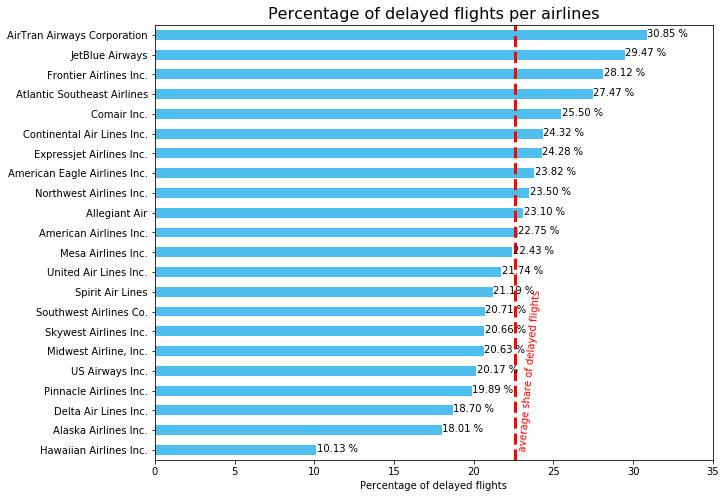

In [54]:
# plot the results
ax = ai3.set_index(['airline'])['%_delayed_of_all'].plot(kind='barh', figsize=(10, 8), fontsize=10, color='#4DBEEE')

for p in ax.patches:
        percentage = '{:.2f} %'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y), size=10)

# line for average percentage of delayed flights
plt.axvline(ai3['Average_delay_%'].iloc[0], linestyle='--', color='r', linewidth=3) 
plt.text(22.8,0,'average share of delayed flights',rotation=85, color='r')

plt.grid(False)
plt.xlim(0, 35)
plt.title('Percentage of delayed flights per airlines', fontsize=16)
plt.xlabel('Percentage of delayed flights', fontsize=10)
plt.ylabel('');

Average percentage of delayed flights per airline is 22,61 %. 

When we look back on graph with airlines and number of flights performed by them, we can notice that 5 biggest airlines (Southwest Airlines, American Airlines, Delta Air Lines, Skywest Airlines and United Air Lines) are quite close to this average, even though Delta Air Lines has sligtly better score then other 4 big airlines. 

Smaller companies (like Hawaiian Airlines or AirTran Airways) can end on either extreme of this rankings (Hawaiian lowest percentage 10 %, AirTran the highest 31 %). 

Now let's look on average delay per airline.

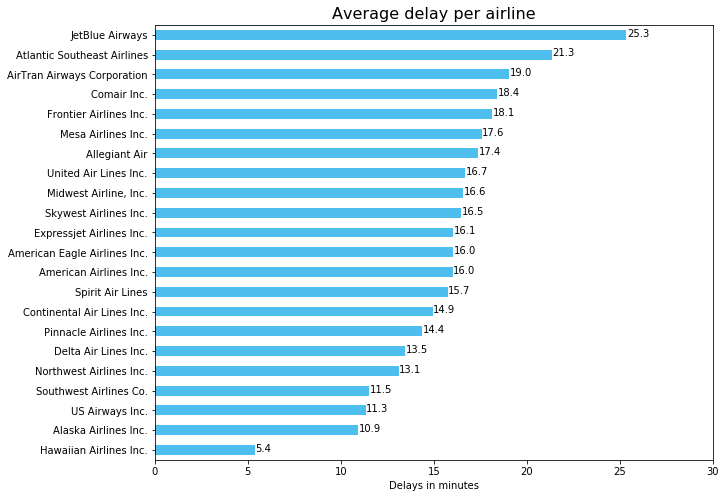

In [55]:
# dataframe with average delay statistics per airline
ail = fly_with_carriers.groupby(['airline'])['arr_delay_new'].mean().to_frame(name = 'average_delay').reset_index()
ail = ail.sort_values(by=['average_delay'])

ax = ail.set_index(['airline'])['average_delay'].plot(kind='barh', figsize=(10, 8), fontsize=10, color='#4DBEEE')

for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y), size=10)
        
plt.xlim(0, 30)
plt.title('Average delay per airline', fontsize=16)
plt.xlabel('Delays in minutes', fontsize=10)
# no gridlines
plt.grid(False)
plt.ylabel('');

If passanger want to avoid long delays, he or she should not take flight with JetBlue Airways, Atlantic Southeast Airlines or AirTran Airways. On the other hand, they can enjoy only short delays from 5 to 11 minutes on board of Hawaiian Airlines, Alaska Airlines or US Airways.

### Delay and airports

In [56]:
# create new dataframes to group delay statistics by airlines
# dataframe with all flights grou by airport
ar1 = fly.groupby(['origin_city_name'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
# work only with 24 bussiest airports
ar1 = ar1[ar1['sum_all_flights']>25000]
# dataframe with delayed flights by airport
ar2 = fly.groupby(['origin_city_name'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
# calculating percentage of delayed flights from all flights of an airport
ar3 = ar1.merge(ar2, left_on='origin_city_name', right_on='origin_city_name', how='left')
ar3['%_delayed_of_all'] = ar3['sum_delayed']*100/ar3['sum_all_flights']
ar3=ar3.sort_values(by='%_delayed_of_all')

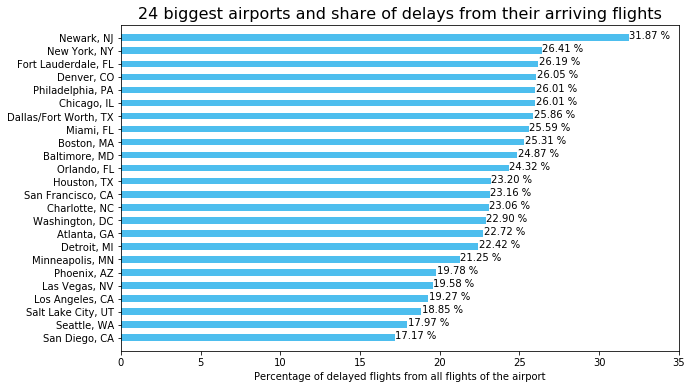

In [57]:
# plot the resultsbb
ax = ar3.set_index(['origin_city_name'])['%_delayed_of_all'].tail(24).plot(kind='barh', figsize=(10, 6), fontsize=10, color='#4DBEEE')

for p in ax.patches:
        percentage = '{:.2f} %'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y), size=10)

plt.xlim(0, 35)
plt.ylim(-1, 24)
plt.grid(False)
plt.title('24 biggest airports and share of delays from their arriving flights', fontsize=16)
plt.xlabel('Percentage of delayed flights from all flights of the airport', fontsize=10)
plt.ylabel('');

Airport in Newark in New Jersey has experienced the most delays from all airports by far (almost 32 % od delayed flights). Second and third most delayed airport is New York and Fort Lauderdale. 

We are looking only on July and December statistics, so it would be interesting to see, if these ratings vary greatly in summer and christmas period. I am assuming percentage for Fort Lauderdale as typical summer destination would be much higher in July compared to December. I will include this in multivariate exploration.

### Delay and time

In [58]:
df1 = fly.groupby(['year', 'month'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
df2 = fly.groupby(['year', 'month'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
df3 = df1.merge(df2)
df3['% of flights delayed'] = df3['sum_delayed']*100/df3['sum_all_flights']
df3

,year,month,sum_all_flights,sum_delayed,% of flights delayed
0,2009,7,571632,121429,21.24
1,2009,12,513051,132020,25.73
2,2019,7,643781,135630,21.07
3,2019,12,618612,126945,20.52


We can see that in July delays appear similarilly often, but December 2019 has noticeable better delay statistics than December 10 years ago, even though number of flights has increased in 2019.

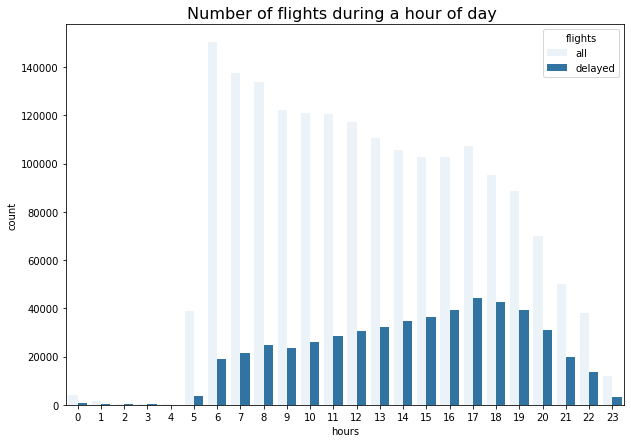

In [59]:
# plot delays occuring in different hour of day
plt.figure(figsize=(10,7))
ax = sns.countplot(data=fly, x='hour', hue='big_delay', color=base_color)
plt.title('Number of flights during a hour of day ', fontsize=16)
plt.xlabel('hours')
ax.grid(False)
l = plt.legend(title='flights')
l.get_texts()[0].set_text('all')
l.get_texts()[1].set_text('delayed');

We can clearly see that more busy time of departure doesn't equal more chances for delay on arrival of that plane. The most busy departure interval (from 06:00 to 09:00) does not result in more delays on landing. Here we see that delays actually tend to increase volume from morning till they reach their maximum in absolute numbers between 17:00 to 20:00 and then start to decrease. This should be more deeply explored in relative terms for each hour.

In [60]:
# create dataframes for delay statistics by hour
# dataframe for all flights per hour
h1 = fly.groupby(['hour'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
# dataframe for delayed flights per hour
h2 = fly.groupby(['hour'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
# calculate percentage of delayed flights per hour
h3 = h1.merge(h2)
h3['%_delayed_of_all'] = h3['sum_delayed']*100/h3['sum_all_flights']
h3=h3.sort_values(by='%_delayed_of_all')

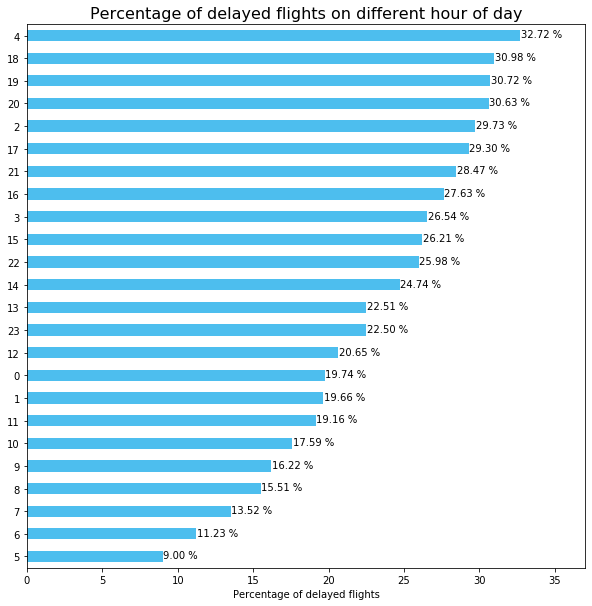

In [61]:
# plot results
ax = h3.set_index(['hour'])['%_delayed_of_all'].plot(kind='barh', figsize=(10, 10), fontsize=10, color='#4DBEEE')

for p in ax.patches:
        percentage = '{:.2f} %'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y), size=10)

plt.grid(False)
plt.xlim(0, 37)
plt.title('Percentage of delayed flights on different hour of day', fontsize=16)
plt.xlabel('Percentage of delayed flights', fontsize=10)
plt.ylabel('');

We can see with few exceptions that from morning till noon delays are getting more frequent and this trend is only getting stonger from noon till late evening. Exceptions are early morning hours that tend to have huge proportion of delayed flights. But from previous univariate exploration of number of flights per hour we know that these times have very low number of flights, therefore these results are statistically less significant then for daily hours. I decided to create new dataframe without these early morning outliers.

In [62]:
# dataframe without morning hours because early morning times seem to be quite big outliers for comparison
fly_wo_morn = fly[fly['hour']>4]

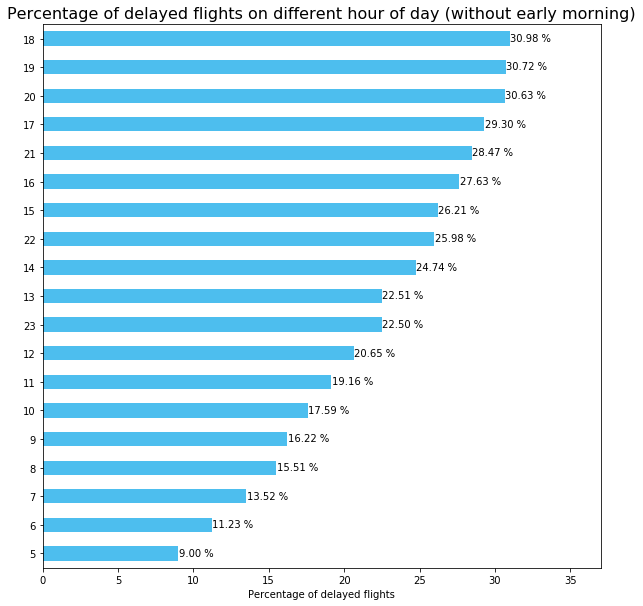

In [63]:
# same steps as in previous delay statistics per hour were performed
h1_w = fly_wo_morn.groupby(['hour'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
h2_w = fly_wo_morn.groupby(['hour'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
h3_w = h1_w.merge(h2_w)
h3_w['%_delayed_of_all'] = h3_w['sum_delayed']*100/h3_w['sum_all_flights']
h3_w=h3_w.sort_values(by='%_delayed_of_all')
ax = h3_w.set_index(['hour'])['%_delayed_of_all'].plot(kind='barh', figsize=(10, 10), fontsize=10, color='#4DBEEE')

for p in ax.patches:
        percentage = '{:.2f} %'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y), size=10)

plt.grid(False)
plt.xlim(0, 37)
plt.title('Percentage of delayed flights on different hour of day (without early morning)', fontsize=16)
plt.xlabel('Percentage of delayed flights', fontsize=10)
plt.ylabel('');

Here, the trend is quitte clear. More late in the day up till 20:00 you take your plane, more likely you will experience delay. Over night most delays have been endured and new day begins with almost zero on delay counter. 

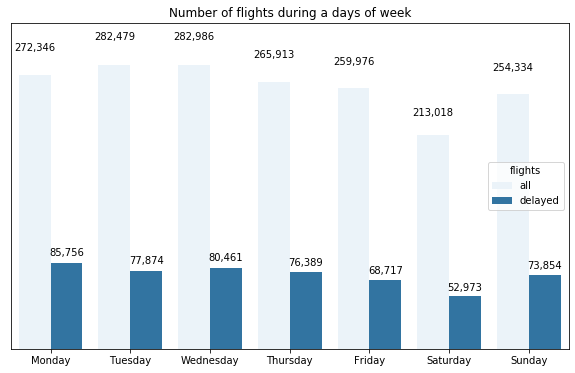

In [64]:
# plot delays by day of week
plt.figure(figsize=(10,6))
ax = sns.countplot(data=fly, x='fl_day', hue='big_delay', color=base_color, order=day_order)
# hide y axis values https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn
ax.set(yticks=[])
plt.title('Number of flights during a days of week')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 325000)
l = plt.legend(title='flights', loc='center right')
l.get_texts()[0].set_text('all')
l.get_texts()[1].set_text('delayed')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.09,
            "{:,.0f}".format(height),
            ha="center") 

Absolute numbers may be misleading, so we will look on proportion of delayed flights on each day.

In [65]:
# create dataframe for delay statistics per day of week
d1 = fly.groupby(['fl_day'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
d2 = fly.groupby(['fl_day'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
d3 = d1.merge(d2)
d3['%_delayed_of_all'] = d3['sum_delayed']*100/d3['sum_all_flights']
d3=d3.sort_values(by='%_delayed_of_all')

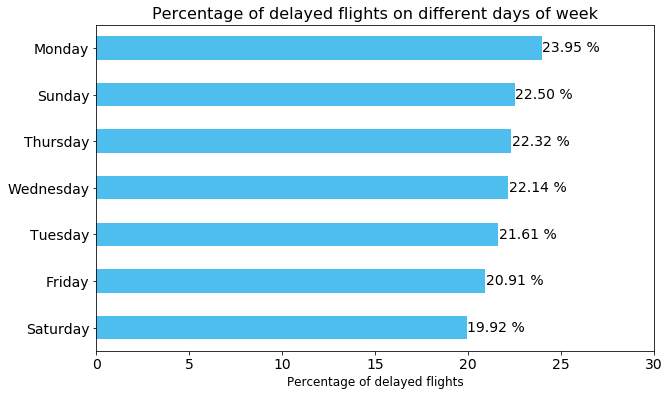

In [66]:
# plot results
ax = d3.set_index(['fl_day'])['%_delayed_of_all'].plot(kind='barh', figsize=(10, 6), fontsize=14, color='#4DBEEE')

for p in ax.patches:
        percentage = '{:.2f} %'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y), size=14)

plt.grid(False)
plt.xlim(0, 30)
plt.title('Percentage of delayed flights on different days of week', fontsize=16)
plt.xlabel('Percentage of delayed flights', fontsize=12)
plt.ylabel('');

Most flights are delayed on Monday, the least on Saturday. Suprising is that second most delays happen on Sundays.

### Delay and distance

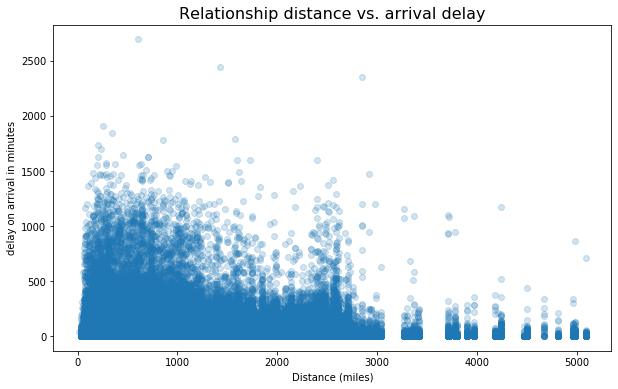

In [67]:
# plot relationship between distance and delays
plt.figure(figsize=(10,6))
plt.scatter(data=fly, x='distance', y='arr_delay_new', alpha=0.2)
plt.title('Relationship distance vs. arrival delay', fontsize=16)
plt.xlabel('Distance (miles)')
plt.ylabel('delay on arrival in minutes')
plt.grid(False);

It does not look like there is any relationship between distance and delays. We can remove outliers from Hawaiian flights, if something will change.

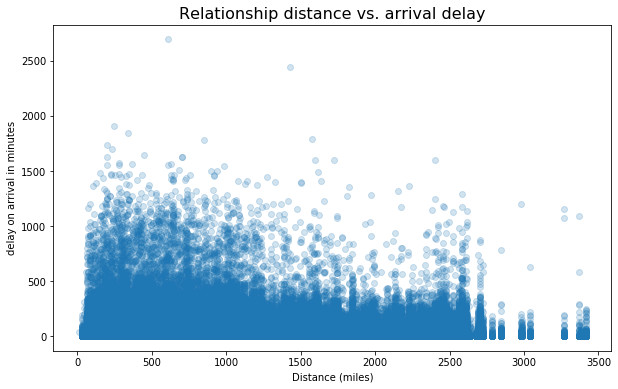

In [68]:
# plot relationship between distance and delays (without flights to and from Hawaii)
plt.figure(figsize=(10,6))
plt.scatter(data=fly_wo_Hawaii, x='distance', y='arr_delay_new', alpha=0.2)
plt.title('Relationship distance vs. arrival delay', fontsize=16)
plt.xlabel('Distance (miles)')
plt.ylabel('delay on arrival in minutes');

This is not much better, even when flights from and Hawaii have been excluded from dataset, there is no visible relationship between distance and delay.

### Delay vs delay reasons

When looking on pairwise relationship between delay reasons and delays, I have also included other numeric variables, distance and air time, just to double check conclusion from previous section that there is no relationship between delay and distance. Air time seems to me very similar to distance, therefore I have not explored it previously.

In [69]:
numeric_vars = ['air_time', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'arr_delay_new', 'big_delay']

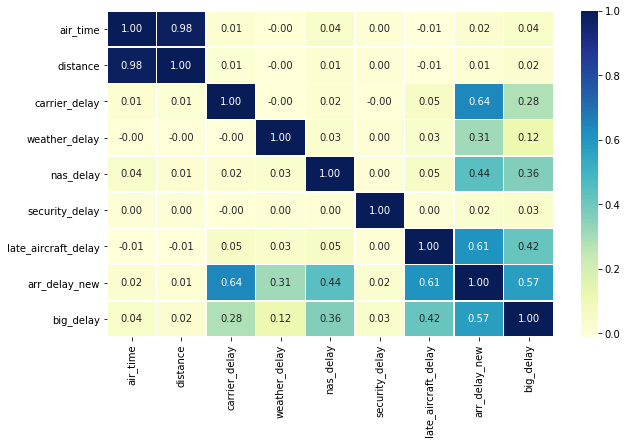

In [70]:
# plot correlation of numeric variables
plt.figure(figsize=[10,6])
ax = sns.heatmap(fly[numeric_vars].corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

# fixing problem with displaying top and bottom boxes cut off
# source: https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

Firstly, we can see that indeed air_time and distance are quite similar as they are highly correlated with each other and neither of these two variables has any relationship with delay.

There is also no relationship between security delay and arrival delay because how rarely this delay reason occurs. On the other hand, even though weather delay occurs very exceptionally as well, there is weak linear relationship between arrival delay and weather delay and rather none betweenn big delay and weather. This suggests that weather delays tend to be quite long. 

Contrary to NAS delay where difference between relationship strength with big_delay or arrival delay is rather small, which would suggest occurence of more delays with shorter duration. 

Carrier delays should be quitte long as we see moderately strong relationship with arrival delay and only weak with big delay. Similar case can be said about late aircraft delay.

In [71]:
# check avearge delay from all cases and also only from delayed cases
del_reason = fly[['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']]

del2 = del_reason.replace(0, np.nan)
del2 = del2.mean().to_frame(name='average_delay_from_delayed').reset_index()

del1 = del_reason.mean().to_frame(name='average_delay_from_all').reset_index()
del1.merge(del2, on='index')

,index,average_delay_from_all,average_delay_from_delayed
0,carrier_delay,4.16,38.87
1,weather_delay,0.79,53.04
2,nas_delay,3.52,29.23
3,security_delay,0.02,21.17
4,late_aircraft_delay,5.58,49.25


From table above we can conclude that late aircraft delays and carrier delays look to be longer in general, but better picture of distribution on delays might be seen from violinplot.

In [72]:
# delay reasons transformed to new dataframe as categorical variables
reasons = ['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']

del_res = pd.DataFrame()

for reason in reasons:
    table = pd.DataFrame()
    table['delay_time'] = fly[fly[reason]>0][reason]
    table['reason'] = reason
    del_res = del_res.append(table)    

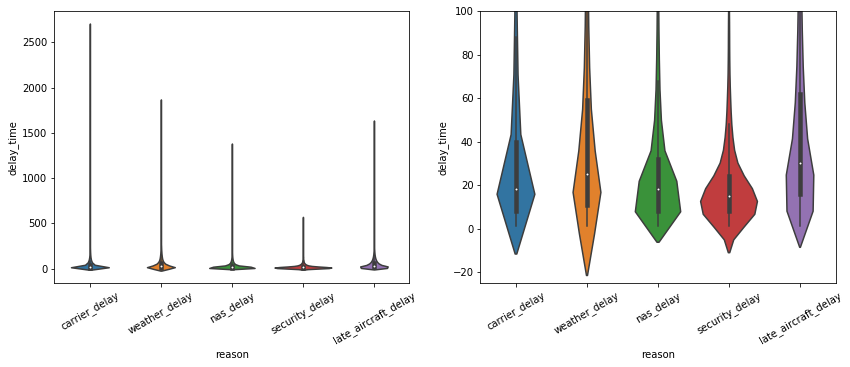

In [73]:
# plot results
plt.figure(figsize=[14, 5])
plt.subplot(1,2, 1)
sns.violinplot(data=del_res, x='reason', y='delay_time')
plt.xticks(rotation=30)
plt.subplot(1,2, 2)
sns.violinplot(data=del_res, x='reason', y='delay_time')
plt.xticks(rotation=30)
plt.ylim([-25,100]);

From violinplots it is more clear that nas and security delay are usually shorter, and weather and late aircraft delays tend to be rather longer.

### Summary of bivariate exploration:

- **Delay and airlines**: Average percentage of delayed flights per airline is 22,61 %. Big companies tend to fluctuate around this average, while very small airlines can be on either extreme of rankings. These three airlines had the highest percentage of delays: AirTran Airways, JetBlue Airways and Frontier Airlines, more then 28 %. AirTran and Frontier Airways belongs to 5 smallest airlines. The lowest percentage of delays had Hawaiian Airlines, which is actually second smallest airline from our analysed group of 22 airlines.

    If passanger want to avoid long delays, he or she should not take flight with JetBlue Airways, Atlantic Southeast Airlines or AirTran Airways. On the other hand, only short delays from 5 to 11 minutes awaits on board of Hawaiian Airlines, Alaska Airlines or US Airways.
    

- **Delay and airports**: The highest percentage of delayed flights from 24 biggest airports (almost 32 %) was found in Newark airport in New Jersey, followed by New York and Fort Lauderdale, both around 26 % o delayes. The least delays happended to passangers arriving to Seattle or San Diego airports (less than 18 %).


- **Delay and time**: 
    
   *day of departure during week:*
   
    Most flights are delayed on Mondays and Sundays, the least on Fridays and Saturdays, even though differences between each days might not be important for many passangers. On Mondays 24 % of flights are delayed, while on Saturdays it is 20 %.
    
   *hour of departure during day:*
   
    If we don't consider early morning flights from 0:00 till 4:59 (when only very little number of planes take off), from 5:00 till 18:00 we can observe steady increase of percentage of delayed flights per hour. From 9 % of delays after 5:00 to reaching maximum of 31 % delays between 18:00 till 18:59. From 19:00 delay rate start to slowly decrease.
    

- **Delay and distance**: Data indicate no relationship between distance and arrival delays.


- **Delay and delay reasons**: National aviation system and security delays last usually shorter time, while late aircraft, carrier and weather delays have longer duration. For example, average weather delay lasted 53 minutes, late aircraft delay 49 minutes and security delay only 21 minutes.


## Multivariate Exploration

### Delays in big airports: summer vs. christmas

Based on high delay rate for flights arriving to Fort Lauderdale, I decided to investigate more deeply different delay rate in July and December in 24 biggest US airports.

In [74]:
# create new dataframe with delay statistics per airport
# dataframe with all flights per airport
m1 = fly.groupby(['month', 'origin_city_name'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
# dataframe with all delays per airport
m2 = fly.groupby(['month','origin_city_name'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
# calculate % of delayed flights per airport
m3 = m1.merge(ar2, left_on='origin_city_name', right_on='origin_city_name', how='left')
m3['%_delayed_of_all'] = m3['sum_delayed']*100/m3['sum_all_flights']
# change month numbers to month names
m3.loc[m3.month==7, 'month']='July'
m3.loc[m3.month==12, 'month']='Dec'
# selecting only 24 big airports
big_airports = list(ar1.origin_city_name.values)
m4 = m3[m3.origin_city_name.isin(big_airports)]
m4 = m4.sort_values(by=['month', '%_delayed_of_all'], ascending=False)

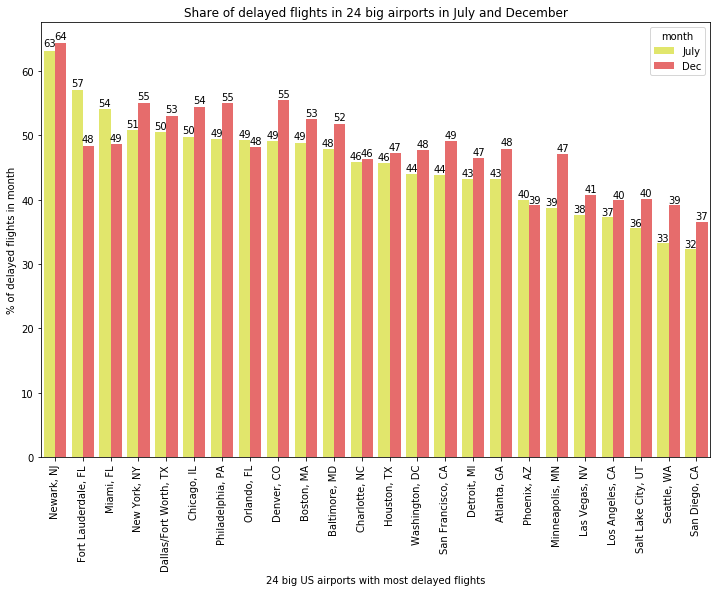

In [75]:
# plot results
plt.figure(figsize=(12,8))
palette ={"July":"#F4FA58","Dec":"#FA5858"}
ax = sns.barplot(data=m4, x='origin_city_name', y='%_delayed_of_all', hue='month', palette=palette)
plt.title('Share of delayed flights in 24 big airports in July and December')
plt.xlabel('24 big US airports with most delayed flights')
plt.ylabel('% of delayed flights in month')
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

All airports have bigger delay rate in December except 4 cases. 3 airports in Florida (Fort Lauderdale, Miami and Orlando) and Phoenix in Arizona. Difference between July and December is just 1 percent point in Orlando and Arizona, therefore not very significant, but results from Fort Lauderdale and Miami prove that typical summer destination experience more delays during vacation period.

I will also look if the same pattern emerges when looking on average delay per airport in July and December.

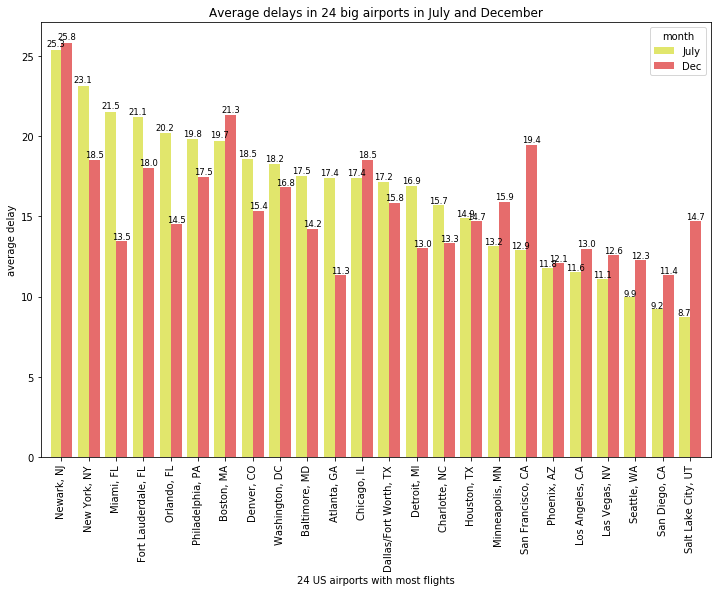

In [76]:
# create new dataframe with delay statistics in minutes per airport
a1 = fly.groupby(['month','origin_city_name'])['arr_delay_new'].mean().to_frame(name = 'average_delay').reset_index()
a1.loc[a1.month==7, 'month']='July'
a1.loc[a1.month==12, 'month']='Dec'

# select only 24 biggest airports
big_airports = list(ar1.origin_city_name.values)
a2 = a1[a1.origin_city_name.isin(big_airports)]
a2 = a2.sort_values(by=['month', 'average_delay'], ascending=False)

# plot results
plt.figure(figsize=(12,8))
palette ={"July":"#F4FA58","Dec":"#FA5858"}
ax = sns.barplot(data=a2, x='origin_city_name', y='average_delay', hue='month', palette=palette)
plt.xlim(-0.75, 23.75)
plt.title('Average delays in 24 big airports in July and December')
plt.xlabel('24 US airports with most flights')
plt.ylabel('average delay')
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.1f}".format(height),
            ha="center", fontsize=8.5);

Even though more flights are delayed in December, 13 airports of 24 have longer average delays in July than in December. (Calculation for that figure provided below).

In [77]:
# calculate difference between avaerage delays in July and Dec for airports
a2jul = a2[a2['month']=='July']
a2dec = a2[a2['month']=='Dec']
a2decjul = a2dec.merge(a2jul, on='origin_city_name')
a2decjul['change'] = a2decjul['average_delay_x'] - a2decjul['average_delay_y']
a2decjul

,month_x,origin_city_name,average_delay_x,month_y,average_delay_y,change
0,Dec,"Newark, NJ",25.78,July,25.34,0.44
1,Dec,"Boston, MA",21.30,July,19.70,1.60
2,Dec,"San Francisco, CA",19.43,July,12.92,6.52
3,Dec,"Chicago, IL",18.49,July,17.39,1.10
4,Dec,"New York, NY",18.48,July,23.09,-4.61
5,Dec,"Fort Lauderdale, FL",17.99,July,21.15,-3.16
6,Dec,"Philadelphia, PA",17.46,July,19.80,-2.34
7,Dec,"Washington, DC",16.79,July,18.25,-1.45
8,Dec,"Minneapolis, MN",15.90,July,13.15,2.75
9,Dec,"Dallas/Fort Worth, TX",15.84,July,17.16,-1.32


In [78]:
# How many airports has longer average delay in July than in December?
a2decjul[a2decjul['change']<0].count()['month_x']

13

### Delays during day of week and hour of day

In [79]:
# create dataframe with delay statistics by day of week and hour of day
del_pct = pd.DataFrame(fly[fly['arr_delay_new']>14].groupby(['fl_day', 'hour'])['year'].count()*100/fly.groupby(['fl_day', 'hour'])['year'].count())
# unpivot grouping to have classic dataframe
del_pct_hour = del_pct.unstack(level=0)

In [80]:
# set order of hours
hour_sorted = np.sort(fly.hour.unique())
hour_sorted

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

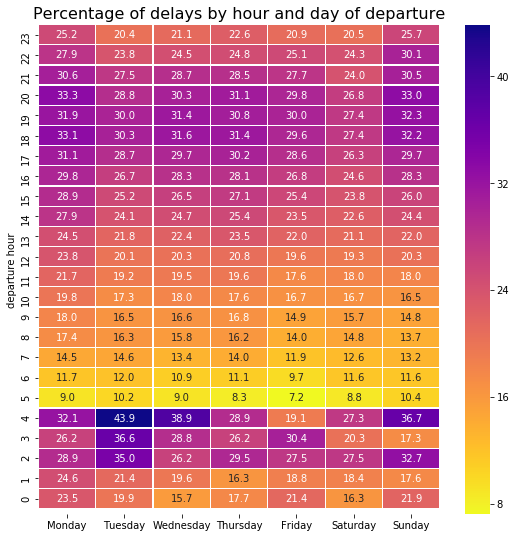

In [81]:
# plot results
plt.figure(figsize=(9,9))
ax = sns.heatmap(del_pct_hour, annot=True, fmt="0.1f", linewidths=0.25, xticklabels=day_order, yticklabels=hour_sorted, cmap="plasma_r")
ax.axes.set_title("Percentage of delays by hour and day of departure", fontsize=16)
ax.set(xlabel='', ylabel='departure hour')
plt.ylim(-0.25, 24);

Results are showing us very high delay rate in early morning, but it can be quitte skewed because of small number of planes taking off during this time. I will try same graph without these morning outliers.

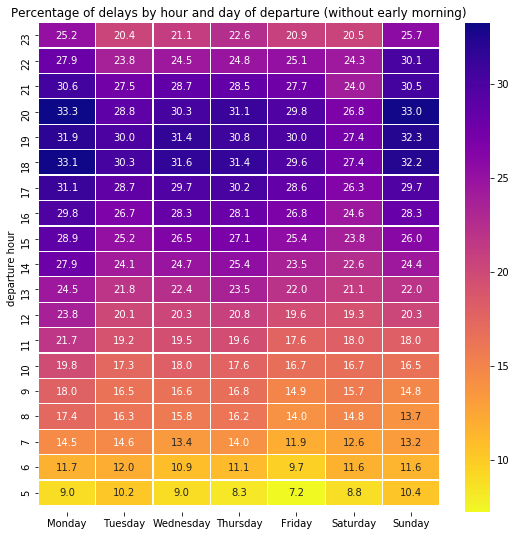

In [94]:
# same steps as above, only now morning hours were removed
del_pct_wo = pd.DataFrame(fly_wo_morn[fly_wo_morn['arr_delay_new']>14].groupby(['fl_day', 'hour'])['year'].count()*100/fly_wo_morn.groupby(['fl_day', 'hour'])['year'].count())
del_pct_hour_wo = del_pct_wo.unstack(level=0)
hour_sorted_wo = np.sort(fly_wo_morn.hour.unique())
plt.figure(figsize=(9,9))
ax = sns.heatmap(del_pct_hour_wo, annot=True, fmt="0.1f", linewidths=0.25, xticklabels=day_order, yticklabels=hour_sorted_wo, cmap="plasma_r")
ax.axes.set_title("Percentage of delays by hour and day of departure (without early morning)", fontsize=12)
ax.set(xlabel='', ylabel='departure hour')
plt.ylim(-0.25, 19)
plt.savefig("pct_delays)", bbox_inches='tight', dpi=600);

Here, we can clearly see that if we want to avoid delays, the worst time is to take plane from 18:00 till 20:59 on Monday or Sunday. The best time would be from 05:00 till 6:59 on any day, but especially Friday or Thursday.

I will also look on duration of delays during different hours of departure and days of week.

In [83]:
# create dataframe with delay statistics in minutes by day of week and hour of day
del_avg = pd.DataFrame(fly.groupby(['fl_day', 'hour'])['arr_delay_new'].mean())
del_avg_hour = del_avg.unstack(level=0)

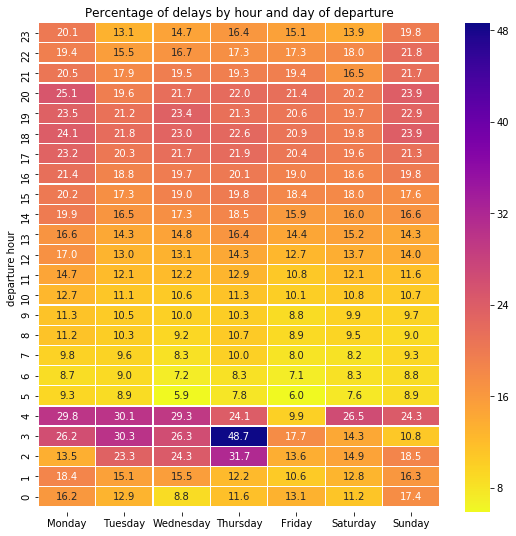

In [84]:
# plot results
ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(del_avg_hour, annot=True, fmt="0.1f", linewidths=0.25, xticklabels=day_order, yticklabels=hour_sorted, cmap="plasma_r")
ax.axes.set_title("Percentage of delays by hour and day of departure", fontsize=12)
ax.set(xlabel='', ylabel='departure hour')
plt.ylim(-0.25, 24);

It looks like early morning hours are again making our comparision little bit problematic. I will remove them in next step based on reasons already stated above.

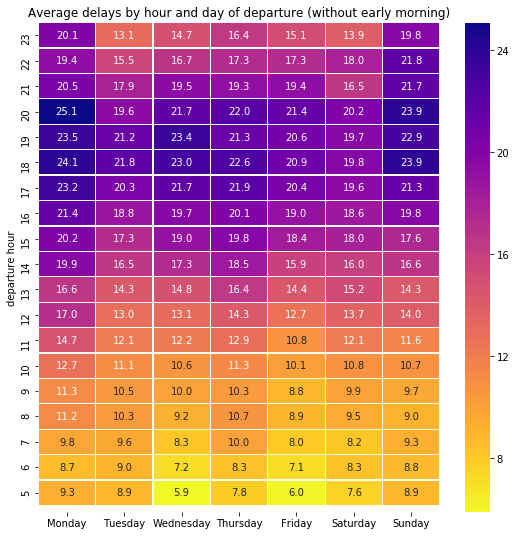

In [85]:
# same steps as above, only now morning hours were removed
del_avg_wo = pd.DataFrame(fly_wo_morn.groupby(['fl_day', 'hour'])['arr_delay_new'].mean())
del_avg_hour_wo = del_avg_wo.unstack(level=0)
plt.figure(figsize=(9, 9))
ax = sns.heatmap(del_avg_hour_wo, annot=True, fmt="0.1f", linewidths=0.25, xticklabels=day_order, yticklabels=hour_sorted_wo, cmap="plasma_r")
ax.axes.set_title("Average delays by hour and day of departure (without early morning)", fontsize=12)
ax.set(xlabel='', ylabel='departure hour')
plt.ylim(-0.25, 19);

If we want to avoid long delays, best time to take flight is from 05:00 till 6:59 on Wednesdays or Fridays. On the other hand, the longest delays passanger will have endure happen usually from 17:00 to 20:59 on Monday, from 18:00 till 19:59 on Wednesday and from 18:00 till 20:59 on Sunday.

### Airlines and delay reasons

I would like to know if some airlines have longer delays from different delay reasons than others, or they do not differ very much. The most focus is on carrier delay because it signifies different quality or service of airlines.

In [86]:
# create dataframe with delay statistics by airline and delay reason
air_res = pd.DataFrame()
reasons = ['late_aircraft_delay','weather_delay', 'nas_delay', 'carrier_delay']

for reason in reasons:
    table = pd.DataFrame()
    table["delay"] = fly_with_carriers[(fly_with_carriers[reason] > 0)][reason]
    table["airline"] = fly_with_carriers[(fly_with_carriers[reason] > 0)]['airline']
    table["reason"] = reason
    air_res = air_res.append(table)

C:\Users\kamil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


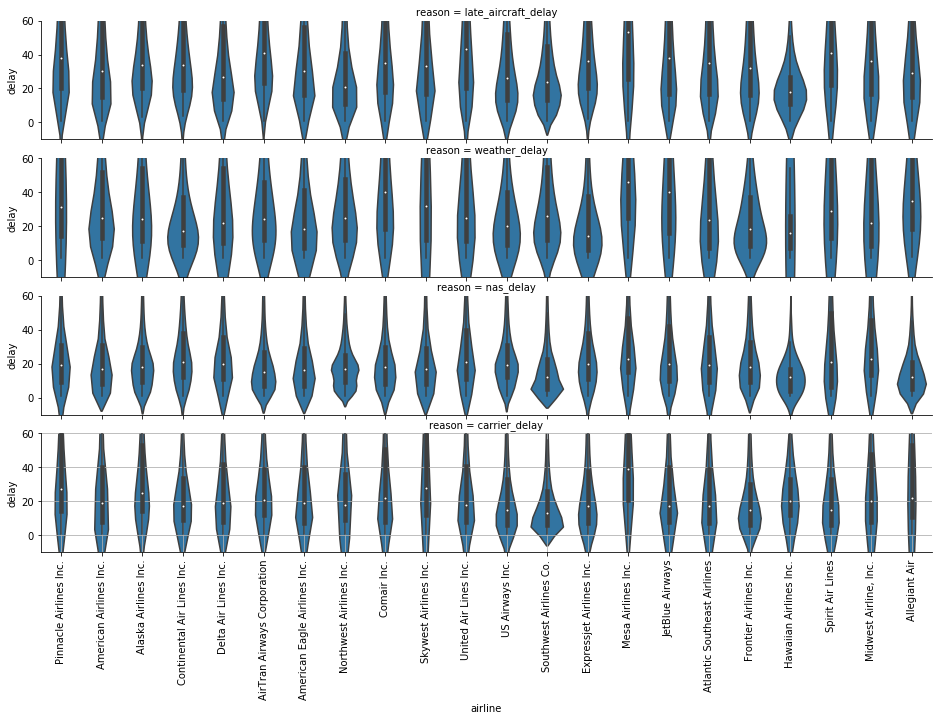

In [87]:
# plot results
# gridlines added for easier comparing

g = sns.FacetGrid(data=air_res, col="reason", col_wrap=1)
g.map(sns.violinplot, 'airline', 'delay')
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylim([-10,60]);

From many results for me stands out that company Mesa Airlines has longer delays than most of other companies, no matter what delay reason. Also Mesa has the highest median from carrier delay reason. Other high medians within carrier delay reason have Pinnacle Airlines or Skywest Airlines. 

### Share of delayed flights per airline in different years

Do airlines have similar percentage of delayed flights over time? I will be looking on different delay rate in 2009 and 2019.

In [88]:
# create dataframe with delay statistics per airline and year
aiy1 = fly_with_carriers.groupby(['year','airline'])['big_delay'].count().to_frame(name = 'sum_all_flights').reset_index()
aiy2 = fly_with_carriers.groupby(['year', 'airline'])['big_delay'].sum().to_frame(name = 'sum_delayed').reset_index()
aiy3 = aiy1.merge(aiy2)
# calculating percentage of delays from all flights per ailine and year
aiy3['%_delayed_of_all'] = aiy3['sum_delayed']*100/aiy3['sum_all_flights']

In [89]:
# selecting only airlines with values in both 2009 and 2019
del_air = aiy3['airline'].value_counts().to_frame()
airlines_to_drop = list(del_air[del_air['airline']==1].index)

In [90]:
aiy3.drop(aiy3.loc[aiy3['airline'].isin(airlines_to_drop)].index, inplace=True)

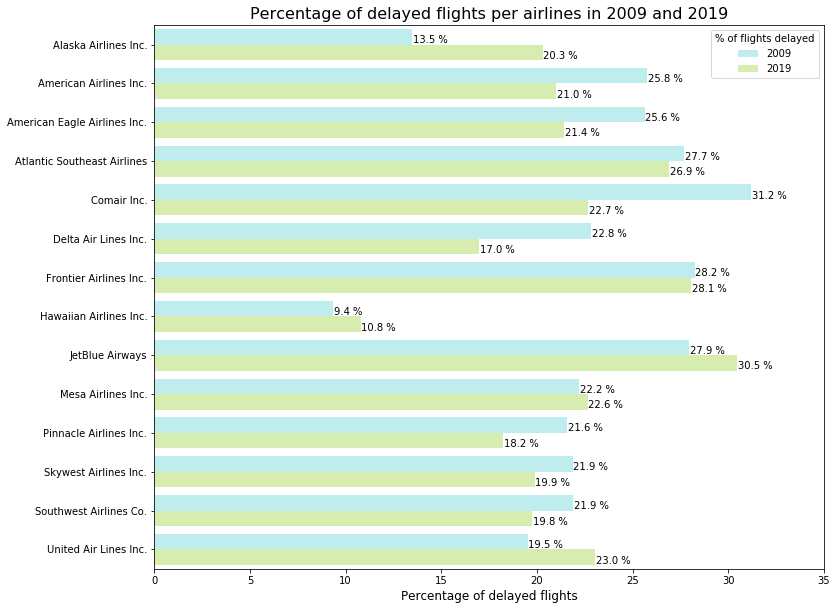

In [91]:
# plot results
plt.figure(figsize=(12, 10))

palette ={2009:"#B7F4F4",2019:"#DAF7A6"}
ax = sns.barplot(y='airline', x='%_delayed_of_all', data=aiy3, hue='year', orient='h', palette=palette)

for p in ax.patches:
        percentage = '{:.1f} %'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.04
        y = p.get_y() + p.get_height()/1.1
        ax.annotate(percentage, (x, y), size=10)
l = plt.legend(title='% of flights delayed')
l.get_texts()[0].set_text('2009')
l.get_texts()[1].set_text('2019')       

plt.grid(False)
plt.xlim(0, 35)
plt.title('Percentage of delayed flights per airlines in 2009 and 2019', fontsize=16)
plt.xlabel('Percentage of delayed flights', fontsize=12)
plt.ylabel('');

From graph we can see that percentage of delayed fligths per airline does not fluctuate much over time. Average and median difference between 2009 and 2019 per airline was around 3 pct points. Only Comair airline had difference in delay statistics in selected years slightly over 8,5 pct points.

In [92]:
# calculating difference of delay stats in 2009 and 2019
aiy09 = aiy3[aiy3.year==2009]
aiy19 = aiy3[aiy3.year==2019]
aiy0919 = pd.merge(aiy09, aiy19, on='airline', how='left')
aiy0919['delay_change09/19'] = abs(aiy0919['%_delayed_of_all_x'] - aiy0919['%_delayed_of_all_y'])
aiy0919[['airline', 'delay_change09/19']]

,airline,delay_change09/19
0,Alaska Airlines Inc.,6.81
1,American Airlines Inc.,4.75
2,American Eagle Airlines Inc.,4.20
3,Atlantic Southeast Airlines,0.80
4,Comair Inc.,8.52
5,Delta Air Lines Inc.,5.84
6,Frontier Airlines Inc.,0.19
7,Hawaiian Airlines Inc.,1.43
8,JetBlue Airways,2.53
9,Mesa Airlines Inc.,0.43


In [93]:
aiy0919['delay_change09/19'].describe()

count   14.00
mean     3.32
std      2.49
min      0.19
25%      1.57
50%      2.94
75%      4.61
max      8.52
Name: delay_change09/19, dtype: float64

### Summary of multivariate exploration:

- **Delays in big airports: summer vs. christmas:** Most airlines had higher percentage of delays in December than in July, this was reversed in 3 airports in Florida and Phoenix in Arizona. When looking on average delay in minutes in December and July, no clear pattern emerged.


- **Delays during day of week and hour of day:** When I removed early morning departure times as outliers, we could clearly see that worst departure times to avoid delays are from 18:00 till 20:59 on Monday or Sunday and best time with the least delays are from 05:00 till 6:59 on any day, but especially Friday or Thursday. This stays true even when looking on average delay duration in minutes, Monday and Sunday evenings are terrible, with addition of Wednesday from 18:00 till 19:59 as also not that great choice. Again, to encounter only short delays on average one should pick morning from 05:00 till 6:59, especially on Wednesday or Friday.


- **Airlines and delay reasons:** I terms of carrier delay worst airlines seemed to be Mesa Airlines, Pinnacle Airlines and Skywest Airlines. Mesa Airlines had very long delays no matter what delay reason we have been looking at.


- **Share of delayed flights per airline in different years:** We have found out that percentage of delayed flights per airline stay rather same over time. Average difference of this statistics in 2009 and 2019 was only 3 pct points. Maximal volatility was seen with airline Comair, where percentage declined by 8,5 pct points between 2009 and 2019.

